GEOG0125 Advanced Topics in Social and Geographic Data Science (2020-2021) Coursework 1_CNN 
===============

### Landuse Prediction in London (4-class) 

This research will use **Scenicness dataset** and landuse data from **OpenStreetMap** to run **Convolutional Neural Network (CNN)**. The prossibility and accuracy for machine learning models to predict landuse can be judged and provide some insights for urban planning field. 

* 0: commercial
* 1: industrial
* 2: park
* 3: residential


OneDrive Link for Corresponding Datasets: https://liveuclac-my.sharepoint.com/:f:/g/personal/zczlah6_ucl_ac_uk/EqZbYiBQZNtAjAwF1epb3QgBWva2r-XnNDTs-CglFtzUqA?e=esEhJP

## Keep same steps

### 1 Load packages

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

### 2 Check datasets

### 2.1 set hyperparameters

In [2]:
# set the hyperparameters
img_width = 64
img_height = 64
batch_size = 32

### 2.2 setup the train data generator and the val data generator

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=40,
        #horizontal_flip=True,
)
validation_datagen = ImageDataGenerator(
        rescale=1. / 255
)

### 2.3 Get the train and val data from the image directory using flow_from_directory

In [4]:
train_generator = train_datagen.flow_from_directory(
        'datasets/train/',  
        # source directory for training images 
        target_size=(img_height, img_width),  
        # resize the images to the image width and height set above
        batch_size=batch_size, # Training is done 
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


validation_generator = validation_datagen.flow_from_directory(
        'datasets/test/',  # This is the source directory for testing images
        target_size=(img_height, img_width),  # All images will be resized
        batch_size=batch_size,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 3767 images belonging to 4 classes.
Found 937 images belonging to 4 classes.


### 2.4 Plot a sample of images from the training set with its labels

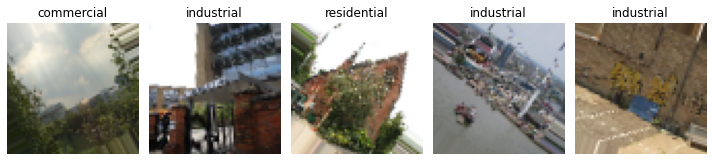

In [5]:
sample_training_images, labels = next(train_generator)
label_names = ['commercial','industrial', 
               'park', 'residential']

def plotImages(images_arr, labels):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax, label in zip(images_arr, axes, labels):
        ax.imshow(img)
        ax.set_title(label_names[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5], labels[:5])

In [6]:
print(labels[:5])

[0. 1. 3. 1. 1.]


### 3 CNN models

### 3.1 Prepare datasets (1000 pictures per category)

In [7]:
import os
import cv2
from tqdm import tqdm

In [8]:
datadir = "datasets/crawl_dataset/"
label_names = ['commercial','industrial', 
               'park', 'residential']

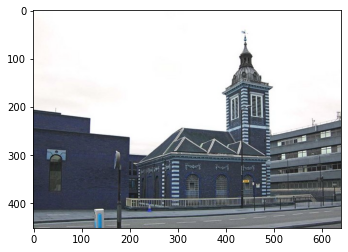

Length : 1


In [9]:
# test

image_dict = {}
for category in label_names: 
    path = os.path.join(datadir,category)  # create path to categories
    for img in os.listdir(path):  # iterate over each image per category
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        image_dict.update({img: img_array}) # for data visualization
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!
print("Length : %d" % len(image_dict))

In [10]:
newarray = []
imgarray = []
location = []
for category in label_names:  
    path = os.path.join(datadir,category)  # create path to categories
    count = 0
    for img in os.listdir(path):  # iterate over each image per category
        if count <= 999:
            try:
                img_array = cv2.imread(os.path.join(path, img) ,cv2.IMREAD_COLOR)  # convert to array
                new_array = cv2.resize(img_array, (img_width, img_height))  # resize to normalize data size
               
                location.append(img)
                newarray.append(np.array(new_array).astype("float32"))
                count += 1
            except Exception as e: 
                pass
            
        # for data visualization (latitude_longitude)
        else:
            pass


In [11]:
'''
for i in imgarray:
    new = cv2.resize(i, (img_width, img_height))
    newarray.append(new)
'''

'\nfor i in imgarray:\n    new = cv2.resize(i, (img_width, img_height))\n    newarray.append(new)\n'

In [12]:
dfimg = {'image': newarray, 'location': location}
dfimg = DataFrame(dfimg)
print(dfimg)

                                                  image  \
0     [[[255.0, 254.0, 250.0], [254.0, 255.0, 253.0]...   
1     [[[37.0, 44.0, 47.0], [35.0, 41.0, 46.0], [46....   
2     [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...   
3     [[[34.0, 36.0, 37.0], [28.0, 32.0, 31.0], [53....   
4     [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...   
...                                                 ...   
3995  [[[25.0, 25.0, 19.0], [22.0, 23.0, 17.0], [19....   
3996  [[[9.0, 6.0, 23.0], [9.0, 5.0, 24.0], [15.0, 9...   
3997  [[[254.0, 253.0, 253.0], [255.0, 254.0, 254.0]...   
3998  [[[202.0, 194.0, 175.0], [203.0, 195.0, 176.0]...   
3999  [[[95.0, 123.0, 146.0], [86.0, 112.0, 134.0], ...   

                    location  
0     51.51161_-0.098642.jpg  
1     51.50936_-0.082019.jpg  
2       51.51532_-0.0675.jpg  
3     51.51206_-0.099056.jpg  
4     51.59974_-0.195606.jpg  
...                      ...  
3995  51.40021_-0.145101.jpg  
3996  51.41661_-0.158244.jpg  
3997   51.58

In [13]:
print(len(dfimg))
dfimg.to_csv("datasets/created_datasets/dfimg.csv",index=False,sep=',')

4000


In [14]:
training_data = []
def create_training_data():
    for category in label_names: 

        path = os.path.join(datadir,category)  # create path 
        class_num = label_names.index(category)  # get the classification 
        count = 0
        for img in tqdm(os.listdir(path)):  # iterate over each image 
            if count <= 999:
                try:
                    img_array = cv2.imread(os.path.join(path, img) ,cv2.IMREAD_COLOR)  # convert to array
                    new_array = cv2.resize(img_array, (img_width, img_height))  # resize to normalize data size
                    training_data.append([new_array, class_num])  # adimage_dict.update({img_array: new_array})
                    count += 1
                except Exception as e: 
                    pass


create_training_data()

print(len(training_data))

100%|██████████| 1099/1099 [00:03<00:00, 306.31it/s]

4000


In [15]:
# check
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1], end = '')

2003121123

In [16]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [17]:
len(y)

4000

#### save to file

In [18]:
import pickle

In [19]:
pickle_out = open("datasets/pickle/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("datasets/pickle/y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

#### load through pickle

In [20]:
pickle_in = open("datasets/pickle/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("datasets/pickle/y.pickle","rb")
y = pickle.load(pickle_in)

In [21]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, 
                                                      train_size=0.8,
                                                      random_state=1)

In [22]:
# summarize loaded dataset
print(f'X_train shape : {np.array(X_train).shape}')
print(f'X_test shape : {np.array(X_test).shape}')
print(f'y_train shape : {np.array(y_train).shape}')
print(f'y_test shape : {np.array(y_test).shape}')

X_train shape : (3200, 64, 64, 3)
X_test shape : (800, 64, 64, 3)
y_train shape : (3200,)
y_test shape : (800,)


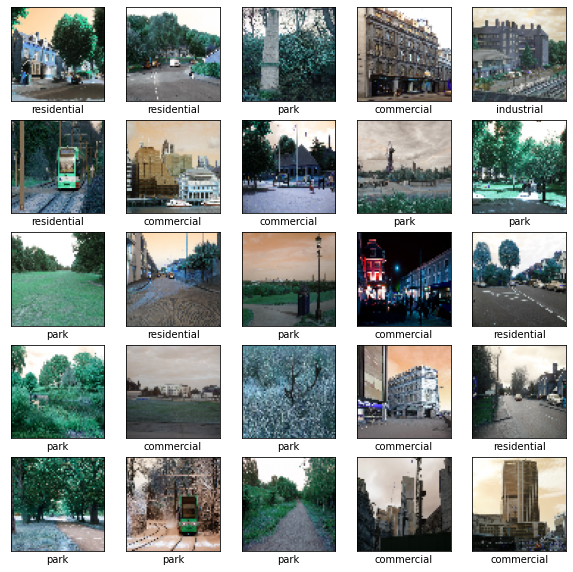

In [23]:
# plot first few images
label_names = ['commercial','industrial', 
               'park', 'residential']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(label_names[y_train[i]])
plt.show()

In [24]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# scale the data to the range [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# convert the labels from integers to vectors
y_train=tf.keras.utils.to_categorical(y_train,4)
y_test = tf.keras.utils.to_categorical(y_test,4)

In [25]:
y_train[0]

array([0., 0., 0., 1.], dtype=float32)

In [26]:
X_train[0].shape

(64, 64, 3)

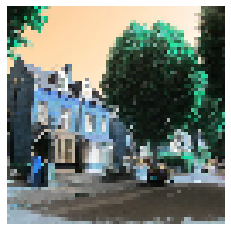

In [27]:
plt.imshow(X_train[0])
plt.axis('off')
plt.show()

### 3.2 Image Data Generator

In [28]:
# I have commented out various augmentation techniques in the imagedatagenerator.
train_image_generator = ImageDataGenerator(#rescale=1. / 255,
                                           rotation_range=18, 
                                           zoom_range=0.15,
                                           #horizontal_flip=True, 
                                            )

val_image_generator = ImageDataGenerator(#rescale=1. / 255,
                                         rotation_range=18, 
                                         zoom_range=0.15,
                                         #horizontal_flip=True, 
                                         )

### 3.3 Optimize CNN model (layers)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/
from tensorflow.keras.callbacks import TensorBoard
import time

In [32]:
layer_sizes = [64, 128]
conv_layers = [2, 3, 4]
input_shape = (64, 64, 3)
epochs = 10
act = 'relu'
batch_sizes = [32, 64]

# TensorBoard website for checking best option of layers 
# http://localhost:6007/

for layer_size in layer_sizes:
    for conv_layer in conv_layers:
        for batch_size in batch_sizes:
            NAME = "{}-conv-{}-nodes-{}-batch".format(conv_layer, layer_size, batch_size)
            tensorboard = TensorBoard(log_dir='datasets/logs/{}'.format(NAME))
            print(NAME)

            model = Sequential()
            model.add(Conv2D(layer_size, (3, 3), input_shape=input_shape))
            model.add(Activation(act)) 
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation(act))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            # Dense layers
            model.add(Dense(len(label_names)))
            model.add(Activation('softmax'))

            optimiser_function = SGD(lr=0.01, momentum=0.9)
            model.compile(optimizer=optimiser_function, loss="categorical_crossentropy", 
                          metrics=["accuracy"])

            model.fit(train_image_generator.flow(X_train, y_train, batch_size=batch_size),
                      validation_data=val_image_generator.flow(X_test, y_test, batch_size=batch_size),
                      epochs=epochs, callbacks=[tensorboard])

2-conv-64-nodes-32-batch
Epoch 1/10
100/100 [==============================] - 10s 96ms/step - loss: 1.3775 - accuracy: 0.3040 - val_loss: 1.2901 - val_accuracy: 0.3750
Epoch 2/10
100/100 [==============================] - 9s 88ms/step - loss: 1.3101 - accuracy: 0.3838 - val_loss: 1.2678 - val_accuracy: 0.4150
Epoch 3/10
100/100 [==============================] - 9s 88ms/step - loss: 1.2271 - accuracy: 0.4453 - val_loss: 1.1633 - val_accuracy: 0.4850
Epoch 4/10
100/100 [==============================] - 9s 92ms/step - loss: 1.1903 - accuracy: 0.4918 - val_loss: 1.1761 - val_accuracy: 0.4875
Epoch 5/10
100/100 [==============================] - 9s 92ms/step - loss: 1.2630 - accuracy: 0.4203 - val_loss: 1.1951 - val_accuracy: 0.4650
Epoch 6/10
100/100 [==============================] - 9s 93ms/step - loss: 1.1641 - accuracy: 0.5121 - val_loss: 1.1788 - val_accuracy: 0.5000
Epoch 7/10
100/100 [==============================] - 9s 92ms/step - loss: 1.1517 - accuracy: 0.5083 - val_loss: 1.2

Epoch 7/10
50/50 [==============================] - 11s 213ms/step - loss: 1.2330 - accuracy: 0.4508 - val_loss: 1.1898 - val_accuracy: 0.4863
Epoch 8/10
50/50 [==============================] - 10s 204ms/step - loss: 1.2246 - accuracy: 0.4538 - val_loss: 1.1873 - val_accuracy: 0.4900
Epoch 9/10
50/50 [==============================] - 10s 201ms/step - loss: 1.2041 - accuracy: 0.4643 - val_loss: 1.2524 - val_accuracy: 0.4025
Epoch 10/10
50/50 [==============================] - 11s 211ms/step - loss: 1.2071 - accuracy: 0.4528 - val_loss: 1.2907 - val_accuracy: 0.4050
2-conv-128-nodes-32-batch
Epoch 1/10
100/100 [==============================] - 21s 210ms/step - loss: 1.3809 - accuracy: 0.2780 - val_loss: 1.3322 - val_accuracy: 0.3462
Epoch 2/10
100/100 [==============================] - 21s 210ms/step - loss: 1.2872 - accuracy: 0.3936 - val_loss: 1.1864 - val_accuracy: 0.4675
Epoch 3/10
100/100 [==============================] - 20s 205ms/step - loss: 1.2363 - accuracy: 0.4483 - val_lo

Epoch 3/10
50/50 [==============================] - 24s 473ms/step - loss: 1.3574 - accuracy: 0.3555 - val_loss: 1.3186 - val_accuracy: 0.3550
Epoch 4/10
50/50 [==============================] - 24s 473ms/step - loss: 1.3093 - accuracy: 0.3737 - val_loss: 1.2254 - val_accuracy: 0.4575
Epoch 5/10
50/50 [==============================] - 24s 475ms/step - loss: 1.2556 - accuracy: 0.4175 - val_loss: 1.2354 - val_accuracy: 0.4325
Epoch 6/10
50/50 [==============================] - 23s 465ms/step - loss: 1.2510 - accuracy: 0.4137 - val_loss: 1.1798 - val_accuracy: 0.4675
Epoch 7/10
50/50 [==============================] - 24s 470ms/step - loss: 1.2031 - accuracy: 0.4588 - val_loss: 1.2124 - val_accuracy: 0.4375
Epoch 8/10
50/50 [==============================] - 24s 478ms/step - loss: 1.2043 - accuracy: 0.4611 - val_loss: 1.1528 - val_accuracy: 0.5013
Epoch 9/10
50/50 [==============================] - 23s 461ms/step - loss: 1.1757 - accuracy: 0.4813 - val_loss: 1.1529 - val_accuracy: 0.4812

#### Comparison results (Top 3)

##### 0.01 learning rate + relu activation function
##### 3-conv-64-nodes-64-batch:
**train-accuracy**: **0.5015**; **train-loss**: **1.1608**; **validation-accuracy**: **0.5312**; **validation-loss**: **1.0967**
##### 4-conv-128-nodes-32-batch:
**train-accuracy**: 0.5170; **train-loss**: 1.1323; **validation-accuracy**: 0.5188; **validation-loss**: 1.1275
##### 4-conv-64-nodes-32-batch:
**train-accuracy**: 0.4900; **train-loss**: 1.1665; **validation-accuracy**: 0.5225; **validation-loss**: 1.1329

<img src="datasets/figure/1-1.png">

<img src="datasets/figure/2.png">

### 3.4 Build a simple sequential CNN model

In [33]:
def sequential_model(width, height, depth, classes):
    # initialize the model along with the input shape
    model = Sequential()
    input_shape = (height, width, depth)
    
    # Conv layer 1
    model.add(Conv2D(64, (3, 3), activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))
    
    # Conv layer 2 
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    # Conv layer 3 
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))
    
    # Flatten the 3D tensor into a 1D vector
    model.add(Flatten())
    
    # Dense layers
    model.add(Dense(classes))
    model.add(Activation('sigmoid'))
    # Display the architecture of our model
    model.summary()
    
    # Return the constructed network architecture
    return model

model = sequential_model(64, 64, 3, len(label_names))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 12, 12, 64)      

### 3.5 Train Convolutional Neural Network with the best option

In [34]:
# Initialize the initial learning rate, batch size and number of epochs to train for
learning_rate = 0.01
batch_size = 64
epochs = 30

In [35]:
# Initialize the optimizer and compile the model. 

optimiser_function = SGD(lr=learning_rate, momentum=0.9)
model.compile(optimizer=optimiser_function, loss="categorical_crossentropy", 
              metrics=["accuracy"])

In [36]:
# Train the network 
history = model.fit(train_image_generator.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=val_image_generator.flow(X_test, y_test, batch_size=batch_size),
                    epochs=epochs)

Epoch 1/30
50/50 [==============================] - 10s 198ms/step - loss: 1.3927 - accuracy: 0.2513 - val_loss: 1.3814 - val_accuracy: 0.2862
Epoch 2/30
50/50 [==============================] - 9s 185ms/step - loss: 1.3697 - accuracy: 0.3199 - val_loss: 1.3420 - val_accuracy: 0.3275
Epoch 3/30
50/50 [==============================] - 9s 188ms/step - loss: 1.3489 - accuracy: 0.3491 - val_loss: 1.3207 - val_accuracy: 0.3038
Epoch 4/30
50/50 [==============================] - 10s 191ms/step - loss: 1.2819 - accuracy: 0.4148 - val_loss: 1.1969 - val_accuracy: 0.4762
Epoch 5/30
50/50 [==============================] - 10s 196ms/step - loss: 1.2641 - accuracy: 0.4516 - val_loss: 1.2128 - val_accuracy: 0.4175
Epoch 6/30
50/50 [==============================] - 10s 203ms/step - loss: 1.2095 - accuracy: 0.4630 - val_loss: 1.1875 - val_accuracy: 0.4675
Epoch 7/30
50/50 [==============================] - 10s 198ms/step - loss: 1.1959 - accuracy: 0.4578 - val_loss: 1.1776 - val_accuracy: 0.4588
E

### 4 Evaluation

### 4.1 Plot the training loss and accuracy

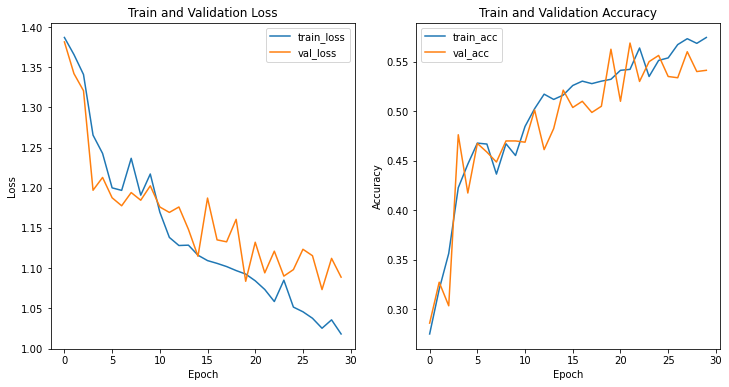

In [55]:
#plt.style.use("ggplot")
fig, ax=plt.subplots(1,2,figsize=(12,6))
ax[0].set_title("Train and Validation Loss")
ax[0].plot(history.history["loss"], label="train_loss")
ax[0].plot(history.history["val_loss"], label="val_loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].set_title("Train and Validation Accuracy")
ax[1].plot(history.history["accuracy"], label="train_acc")
ax[1].plot(history.history["val_accuracy"], label="val_acc")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
fig.savefig("datasets/figure/sequential.jpg", bbox_inches='tight', pad_inches=0.5, dpi=300)
plt.show()


### 4.2 Evaluate the predictions

In [38]:
model.evaluate(X_test,y_test)

25/25 [==============================] - 1s 17ms/step - loss: 1.1049 - accuracy: 0.5575


[1.1049385070800781, 0.5575000047683716]

### 4.3 produce a confusion matrix

In [39]:
# import the libraries necessary for your confusion plot
from sklearn.metrics import confusion_matrix
import seaborn as sns

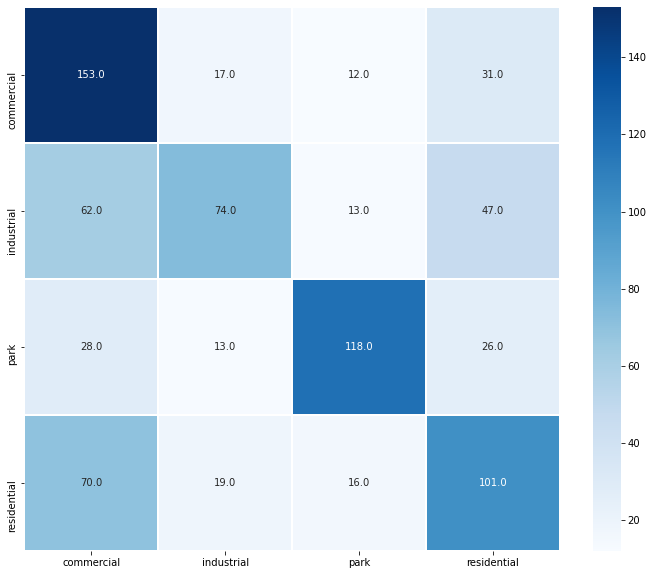

In [40]:
# make the plot
fig,ax=plt.subplots(figsize=(12,10))
y_pred = model.predict(X_test, batch_size=batch_size)
df=pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), 
                                 y_pred.argmax(axis=1)), 
                # except axis=1(max[axis=1]); others -> matrix
                index=label_names,columns=label_names)
sns.heatmap(df, annot=True,linewidths=.5, 
            cmap="Blues", fmt=".1f", ax=ax )
fig.savefig("datasets/figure/matrix.jpg", bbox_inches='tight', pad_inches=0.5, dpi=300)
plt.show()

### 5 Prediction

In [41]:
def load_image(image):
    img = image.astype('float32')
    img_tensor = np.expand_dims(img, axis=0)                       
    return img_tensor

#### randomly check predictions

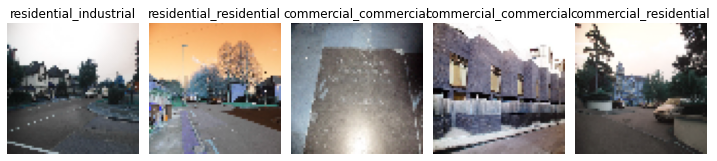

In [42]:
labels = np.array(label_names)
image_array = []
test_value = []
pred_value =[]
fig, ax = plt.subplots(1,5, figsize=(10,10))
for i in range(5):
    index = random.randint(0, X_test.shape[0])
    img = X_test[index]
    img_tensor= load_image(img)
    label = (np.where(y_test[index] == 1)[0][0])
    y_pred=model.predict(img_tensor)
    best_class = np.argmax(y_pred)
    
    image_array.append(X_test[index])
    test_value.append(labels[label])
    pred_value.append(labels[best_class])
    ax[i].imshow(img)
    ax[i].set_title(labels[label]+'_'+labels[best_class])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [43]:
labels = np.array(label_names)
image_array = []
image_array255 = []
test_value = []
pred_value =[]

for i in range(len(X_test)):
    index = i
    img = X_test[index]
    img_tensor= load_image(img)
    label = (np.where(y_test[index] == 1)[0][0])
    y_pred=model.predict(img_tensor)
    best_class = np.argmax(y_pred)
    
    image_array.append(X_test[index])
    image_array255.append(X_test[index]*255) # restore
    test_value.append(labels[label])
    pred_value.append(labels[best_class])  

In [44]:
data = {'image': image_array, 'test': test_value, 'pred': pred_value}
df_pred = DataFrame(data)
print(df_pred)

                                                 image         test  \
0    [[[0.8784314, 0.8352941, 0.81960785], [0.88235...         park   
1    [[[0.81960785, 0.8, 0.8039216], [0.8235294, 0....   industrial   
2    [[[0.5372549, 0.4, 0.23137255], [0.5529412, 0....  residential   
3    [[[0.9882353, 0.9882353, 0.9882353], [0.992156...  residential   
4    [[[0.2, 0.2, 0.2], [0.2, 0.2, 0.2], [0.2, 0.2,...   industrial   
..                                                 ...          ...   
795  [[[0.90588236, 0.8784314, 0.8666667], [0.90588...         park   
796  [[[0.2, 0.32156864, 0.3019608], [0.2901961, 0....   commercial   
797  [[[0.33333334, 0.4, 0.34901962], [0.15686275, ...         park   
798  [[[0.80784315, 0.78039217, 0.74509805], [0.807...  residential   
799  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...   industrial   

            pred  
0           park  
1     industrial  
2     commercial  
3    residential  
4     commercial  
..           ...  
795   industri

In [45]:
df_pred.to_csv("datasets/created_datasets/prediction.csv",index=False,sep=',')
print(len(df_pred))

800


#### Prepare to concatenate with latitude & longitude dataframe

In [46]:
data = {'image': image_array255, 'test': test_value, 'pred': pred_value}
df_pred255 = DataFrame(data)
df_pred255.head()
df_pred255.to_csv("datasets/created_datasets/prediction255.csv",index=False,sep=',')
print(len(df_pred255))

800


#### Load in the created datasets

In [47]:
df_pred255 = pd.read_csv("datasets/created_datasets/prediction255.csv")
dfimg = pd.read_csv("datasets/created_datasets/dfimg.csv")

In [100]:
df_merge = pd.merge(left=dfimg, right=df_pred255, on='image')
df_merge.head()

,image,location,test,pred
0,[[[255. 255. 255.]\n [255. 255. 255.]\n [255...,51.51532_-0.0675.jpg,commercial,commercial
1,[[[255. 255. 255.]\n [255. 255. 255.]\n [255...,51.52557_-0.083645.jpg,commercial,industrial
2,[[[30. 27. 29.]\n [32. 29. 30.]\n [30. 28. 2...,51.51307_-0.083449.jpg,commercial,commercial
3,[[[238. 220. 209.]\n [244. 225. 217.]\n [244...,51.50883_-0.082762.jpg,commercial,commercial
4,[[[253. 253. 253.]\n [253. 253. 253.]\n [253...,51.51482_-0.09159.jpg,commercial,commercial


In [101]:
landuse_pred = df_merge[['location','test','pred']]
landuse_pred.head()

,location,test,pred
0,51.51532_-0.0675.jpg,commercial,commercial
1,51.52557_-0.083645.jpg,commercial,industrial
2,51.51307_-0.083449.jpg,commercial,commercial
3,51.50883_-0.082762.jpg,commercial,commercial
4,51.51482_-0.09159.jpg,commercial,commercial


In [102]:
coordinates = landuse_pred['location'].str.split('_', expand=True)
coordinates.columns = ['latitude','mix'] # (latitude_longitude)
plot_data = pd.concat([landuse_pred,coordinates],axis=1)
plot_data.head()

,location,test,pred,latitude,mix
0,51.51532_-0.0675.jpg,commercial,commercial,51.51532,-0.0675.jpg
1,51.52557_-0.083645.jpg,commercial,industrial,51.52557,-0.083645.jpg
2,51.51307_-0.083449.jpg,commercial,commercial,51.51307,-0.083449.jpg
3,51.50883_-0.082762.jpg,commercial,commercial,51.50883,-0.082762.jpg
4,51.51482_-0.09159.jpg,commercial,commercial,51.51482,-0.09159.jpg


In [103]:
longitude = plot_data['mix'].str.split('.jpg', expand=True)
longitude.columns = ['longitude','jpg']
longitude = longitude[['longitude']]
plot_data = pd.concat([plot_data,longitude],axis=1)
plot_data.head()

,location,test,pred,latitude,mix,longitude
0,51.51532_-0.0675.jpg,commercial,commercial,51.51532,-0.0675.jpg,-0.0675
1,51.52557_-0.083645.jpg,commercial,industrial,51.52557,-0.083645.jpg,-0.083645
2,51.51307_-0.083449.jpg,commercial,commercial,51.51307,-0.083449.jpg,-0.083449
3,51.50883_-0.082762.jpg,commercial,commercial,51.50883,-0.082762.jpg,-0.082762
4,51.51482_-0.09159.jpg,commercial,commercial,51.51482,-0.09159.jpg,-0.09159


In [104]:
import geopandas as gpd
import contextily as ctx
gdf = gpd.GeoDataFrame(plot_data, geometry=gpd.points_from_xy(plot_data.longitude, 
                                                              plot_data.latitude))
gdf.head()

,location,test,pred,latitude,mix,longitude,geometry
0,51.51532_-0.0675.jpg,commercial,commercial,51.51532,-0.0675.jpg,-0.0675,POINT (-0.06750 51.51532)
1,51.52557_-0.083645.jpg,commercial,industrial,51.52557,-0.083645.jpg,-0.083645,POINT (-0.08364 51.52557)
2,51.51307_-0.083449.jpg,commercial,commercial,51.51307,-0.083449.jpg,-0.083449,POINT (-0.08345 51.51307)
3,51.50883_-0.082762.jpg,commercial,commercial,51.50883,-0.082762.jpg,-0.082762,POINT (-0.08276 51.50883)
4,51.51482_-0.09159.jpg,commercial,commercial,51.51482,-0.09159.jpg,-0.09159,POINT (-0.09159 51.51482)


In [105]:
'''
wes = gpd.read_file('datasets/london/westminster.shp')
landuse_wes = gpd.clip(gdf, wes)
'''

"\nwes = gpd.read_file('datasets/london/westminster.shp')\nlanduse_wes = gpd.clip(gdf, wes)\n"

In [106]:
industry=gdf[gdf['test']=='industrial']
industry.head()
park=gdf[gdf['test']=='park']
park.head()

,location,test,pred,latitude,mix,longitude,geometry
409,51.50554_-0.186793.jpg,park,park,51.50554,-0.186793.jpg,-0.186793,POINT (-0.18679 51.50554)
410,51.5058_-0.163295.jpg,park,commercial,51.5058,-0.163295.jpg,-0.163295,POINT (-0.16329 51.50580)
411,51.56385_-0.172067.jpg,park,park,51.56385,-0.172067.jpg,-0.172067,POINT (-0.17207 51.56385)
412,51.52672_-0.127134.jpg,park,residential,51.52672,-0.127134.jpg,-0.127134,POINT (-0.12713 51.52672)
413,51.44226_0.107418.jpg,park,park,51.44226,0.107418.jpg,0.107418,POINT (0.10742 51.44226)


In [107]:
p_points = []
for i in range(len(park)):
    lat = float(park.iloc[i][['latitude']])
    lon = float(park.iloc[i][['longitude']])
    coordinate = [lat, lon]
    user1_points.append(coordinate)
i_points = []
for i in range(len(industry)):
    lat = float(industry.iloc[i][['latitude']])
    lon = float(industry.iloc[i][['longitude']])
    coordinate = [lat, lon]
    user2_points.append(coordinate)

In [108]:
import networkx as nx
import osmnx as ox
import folium
import folium.plugins
from folium import FeatureGroup, LayerControl, Map, Marker, Icon, PolyLine

In [79]:
# Create a map with the center as first point in the points list and set the zoom to 30
my_map = Map([51.523, 0.08620], zoom_start=13)
# Add markers for each point
for p in p_points:
        marker = Marker(p) # Creating a new marker
        icon = Icon(color='red')
        icon.add_to(marker) # Setting the marker's icon color 
        marker.add_to(my_map)
for p in i_points:
        marker = Marker(p) # Creating a new marker
        icon = Icon(color='blue')
        icon.add_to(marker) # Setting the marker's icon color 
        marker.add_to(my_map)
        
# Display the map
my_map

/opt/anaconda3/envs/envGEOG0125/lib/python3.8/site-packages/geopandas/plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


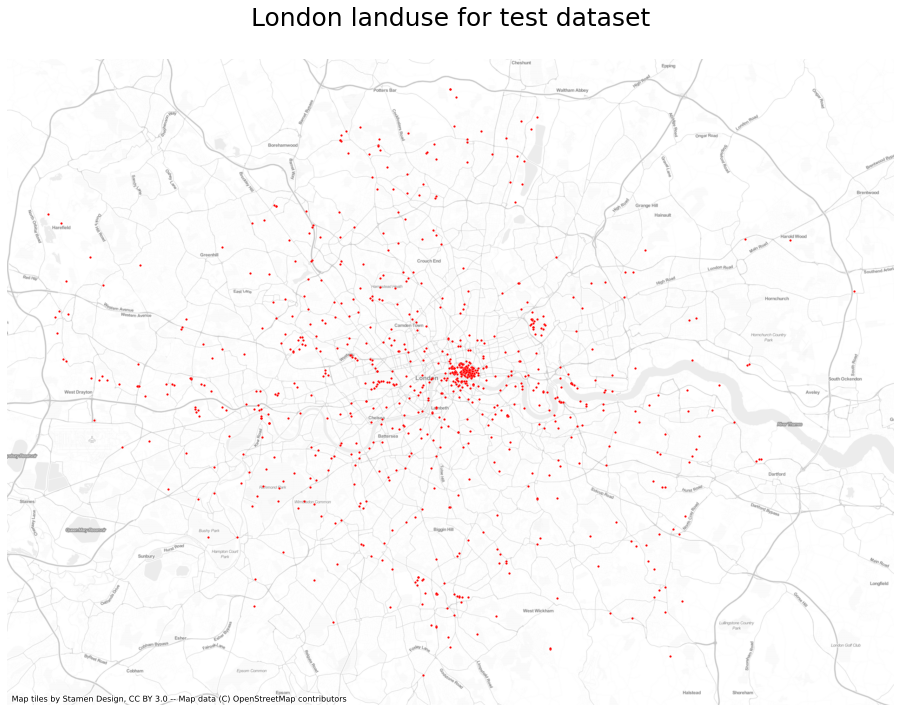

In [109]:
gdf_test =gdf.set_crs(epsg=4326)
gdf_test= gdf_test.to_crs(epsg=3857)
fig,ax=plt.subplots(figsize=(15, 10))
landuseplot=gdf_test.plot(figsize=(8, 8), alpha=1, linewidth=0.1,
                      edgecolor='white',ax=ax,legend=True,markersize=5,
                      column='test', color='red')
# add the basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.5)

# set the title
ax.set_title("London landuse for test dataset\n",fontsize= 25)
# remove the axis
ax.set_axis_off()
# tighten the layout
fig.tight_layout()

In [113]:
gdf1 = gdf.dissolve(by='test', aggfunc='sum')
gdf1

,geometry,location,pred,latitude,mix,longitude
test,,,,,,
commercial,"MULTIPOINT (-0.45110 51.48298, -0.44358 51.509...",51.51532_-0.0675.jpg51.52557_-0.083645.jpg51.5...,commercialindustrialcommercialcommercialcommer...,51.5153251.5255751.5130751.5088351.5148251.505...,-0.0675.jpg-0.083645.jpg-0.083449.jpg-0.082762...,-0.0675-0.083645-0.083449-0.082762-0.09159-0.0...
industrial,"MULTIPOINT (-0.48994 51.54553, -0.48767 51.535...",51.50355_-0.408911.jpg51.47427_-0.125251.jpg51...,industrialcommercialindustrialresidentialresid...,51.5035551.4742751.3869151.3959451.3853251.383...,-0.408911.jpg-0.125251.jpg-0.134428.jpg-0.0479...,-0.408911-0.125251-0.134428-0.047954-0.130325-...
park,"MULTIPOINT (-0.47925 51.56751, -0.40677 51.577...",51.50554_-0.186793.jpg51.5058_-0.163295.jpg51....,parkcommercialparkresidentialparkparkparkresid...,51.5055451.505851.5638551.5267251.4422651.4517...,-0.186793.jpg-0.163295.jpg-0.172067.jpg-0.1271...,-0.186793-0.163295-0.172067-0.1271340.107418-0...
residential,"MULTIPOINT (-0.49695 51.60839, -0.48386 51.602...",51.64491_-0.061995.jpg51.47957_0.026183.jpg51....,residentialcommercialindustrialcommercialindus...,51.6449151.4795751.3851751.5297151.5907251.550...,-0.061995.jpg0.026183.jpg-0.236395.jpg-0.18554...,-0.0619950.026183-0.236395-0.185545-0.1539530....


/opt/anaconda3/envs/envGEOG0125/lib/python3.8/site-packages/geopandas/plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


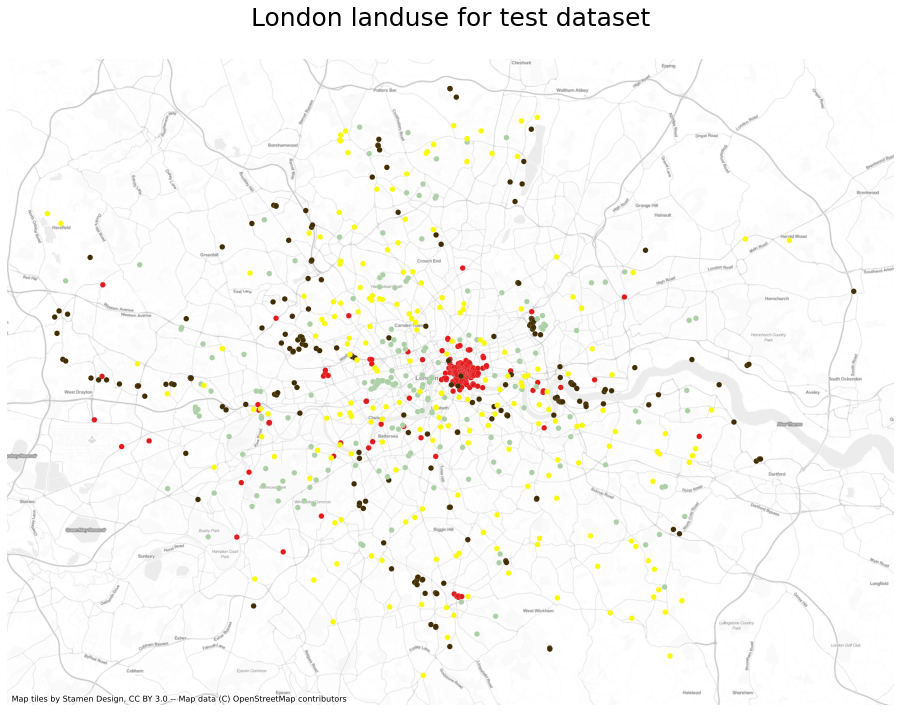

In [114]:
gdf1 =gdf1.set_crs(epsg=4326)
gdf1= gdf1.to_crs(epsg=3857)
fig,ax=plt.subplots(figsize=(15, 10))
landuseplot=gdf1.plot(figsize=(8, 8), alpha=1, linewidth=0.1,
                      edgecolor='white',ax=ax,legend=True,markersize=30,
                      column='test', color=['#e31a1c','#412d00','#acd0a5','#fafa01'])
# add the basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.5)

# set the title
ax.set_title("London landuse for test dataset\n",fontsize= 25)
# remove the axis
ax.set_axis_off()
# tighten the layout
fig.tight_layout()

fig.savefig("datasets/figure/London landuse for test dataset.jpg", bbox_inches='tight', pad_inches=0.5, dpi=300)

/opt/anaconda3/envs/envGEOG0125/lib/python3.8/site-packages/geopandas/plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


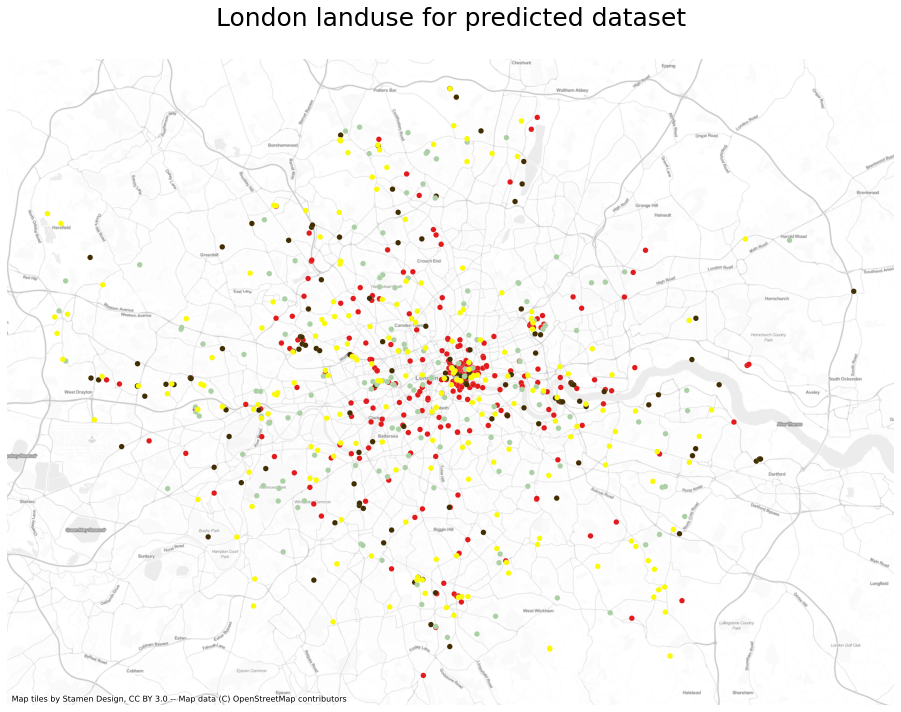

In [115]:
gdf2 = gdf.dissolve(by='pred', aggfunc='sum')
gdf2 =gdf2.set_crs(epsg=4326)
gdf2 = gdf2.to_crs(epsg=3857)
fig,ax=plt.subplots(figsize=(15, 10))
landuseplot=gdf2.plot(figsize=(8, 8), alpha=1, linewidth=0.1,
                      edgecolor='white',ax=ax,legend=True,markersize=30,
                      column='test', color=['#e31a1c','#412d00','#acd0a5','#fafa01'])
# add the basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.5)

# set the title
ax.set_title("London landuse for predicted dataset\n",fontsize= 25)
# remove the axis
ax.set_axis_off()
# tighten the layout
fig.tight_layout()

fig.savefig("datasets/figure/London landuse for predicted dataset.jpg", bbox_inches='tight', pad_inches=0.5, dpi=300)